In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
# Set the font family and size to use for Matplotlib figures.
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 16

In [5]:
def rho_green_light(x, rho_light):
    """
    Computes the "green light" initial condition.
    It consists of a shock with a linear distribution behind it.
    
    Parameters
    ----------
    x : np.ndarray
        Locations on the road as a 1D array of floats.
    rho_light : float
        Car density at the stoplight
        
    Returns
    -------
    rho : np.ndarray
        The initial car density along the road as a 1D array of floats.
    """
    rho = np.zeros_like(x)
    mask = np.where(x < 2.0)
    rho[mask] = rho_light * x[mask] / 2.0
    return rho

In [6]:
# Set parameters.
nx = 81 # number of locations on the road
L = 4.0 # length of the road
dx = L / (nx - 1) # distance between two consecutive locations
nt = 30 # number of time step to compute
u_max = 1.0 # maximum speed allowed on the road
rho_max = 10.0 # maximum car density allowed on the road
rho_light = 10.0 # car density at the stoplight

# Discretize the road.
x = np.linspace(0.0, L, num=nx)

# Compute the initial traffic density.
rho0 = rho_green_light(x, rho_light)

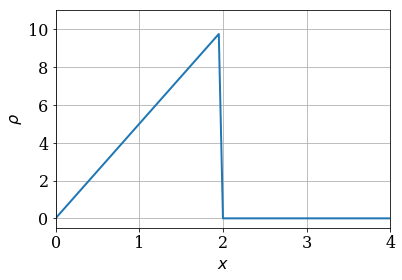

In [8]:
# Plot the initial car density on the road.
plt.figure(figsize=(6.0, 4.0))
plt.xlabel(r'$x$')
plt.ylabel(r'$\rho$')
plt.grid()
plt.plot(x, rho0, color='C0', linestyle='-', linewidth=2)
plt.xlim(0.0, L)
plt.ylim(-0.5, 11.0);

In [9]:
def flux(rho, u_max, rho_max):
    """
    Computes the traffic flux F = V * rho.
    
    Parameters
    ----------
    rho : np.ndarray
        Traffic density along the road as a 1D array of floats.
    u_max : float
        Maximum speed allowed on the road.
    rho_max : float
        Maximum car density allowed on the road.
    
    Returns
    -------
    F : np.ndarray
        The traffic flux along the road as a 1D array of floats.
    """
    F = rho * u_max * (1.0 - rho / rho_max)
    return F

In [10]:
def ftbs(rho0, nt, dt, dx, bc_value, *args):
    """
    Computes the history of the traffic density on the road
    at a certain time given the initial traffic density.
    
    Parameters
    ----------
    rho0 : np.ndarray
        The initial car density along the road
        as a 1D array of floats
    nt : integer
        The number of time steps to compute.
    dt : float
        The time-step to integrate.
    dx : float
        The distance between two consecutive locations.
    bc_value : float
        The constant density at the first station.
    args : list or tuple
        Positional arguments to be passed to the flux function.
    
    Returns
    -------
    rho_hist : list of np.ndarray objects
        The history of the car density along the road.
    """
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        # Compute the flux.
        F = flux(rho, *args)
        # Advance in time.
        rho[1:] = rho[1:] - dt / dx * (F[1:] - F[:-1])
        # Set the left boundary condition.
        rho[0] = bc_value
        # Record the time-step solution.
        rho_hist.append(rho.copy())
    return rho_hist

In [11]:
# Set the time-step size based on the CFL limit.
sigma = 1.0
dt = sigma * dx / u_max # time-step size

# Compute the traffic density at all time steps.
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, rho_max)

In [12]:
import matplotlib.animation as anim
from IPython.display import HTML

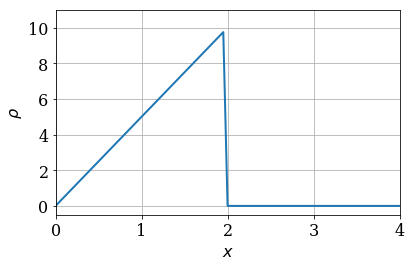

In [13]:
# Plot the initial traffic density.
fig = plt.figure(figsize=(6.0, 4.0))
plt.xlabel(r'$x$')
plt.ylabel(r'$\rho$')
plt.grid()
line = plt.plot(x, rho0,
                color='C0', linestyle='-', linewidth=2)[0]
plt.xlim(0.0, L)
plt.ylim(-0.5, 11.0)
fig.tight_layout()

In [14]:
def update_plot(n, rho_hist):
    """
    Update the line y-data pf the Matplotlib figure.
    
    Parameters
    ----------
    n : integer
        The time-step index.
    rho_hist : list of np.ndarray objects
        The history of the numerical solution.
    """
    fig.suptitle('Time step {:0>2}'.format(n))
    line.set_ydata(rho_hist[n])

In [15]:
# Create an animation of the traffic density.
anim = anim.FuncAnimation(fig, update_plot,
                          frames=nt, fargs=(rho_hist,),
                          interval=100)

# Display the video.
HTML(anim.to_html5_video())

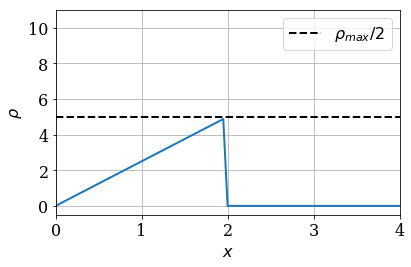

In [16]:
# Modify some parameters.
nt = 40 # number of time steps to compute
rho_light = 5.0 # car density at the stoplight

# Compute the initial traffic density.
rho0 = rho_green_light (x, rho_light)

# Plot the initial traffic density.
fig = plt.figure(figsize=(6.0, 4.0))
plt.xlabel(r'$x$')
plt.ylabel(r'$\rho$')
plt.grid()
line = plt.plot(x, rho0,
                color='C0', linestyle='-', linewidth=2)[0]
plt.hlines(rho_max / 2.0, 0.0, L, 
           label=r'$\rho_{max} / 2$',
           color='black', linestyle='--', linewidth=2)
plt.legend()
plt.xlim(0.0, L)
plt.ylim(-0.5, 11.0)
fig.tight_layout()

In [24]:
# Compute the traffic density at all time steps.
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, rho_max)

In [29]:
import matplotlib.animation as anim2

In [30]:
# Create an animation of the traffic density.
anim1 = anim2.FuncAnimation(fig, update_plot,
                          frames = nt, fargs=(rho_hist,),
                          interval=100)

# Display the animation.
HTML(anim1.to_html5_video())

In [31]:
import matplotlib.animation as anim3

In [32]:
# Beware the CFL !

# Set the parameters.
rho_light = 4.0
u_max = 1.1

# Compute the initial traffic density.
rho0 = rho_green_light(x, rho_light)

# Compute the traffic density at all time steps.
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, rho_max)

# Create an animation of the traffic density.
anim3 = anim3.FuncAnimation(fig, update_plot,
                            frames=nt, fargs=(rho_hist,),
                            interval=100)

# Display the video.
HTML(anim3.to_html5_video())